#Объект анализа

В рамках настоящей работы проведен анализ протоколов Uniswap (V2 и V3) \\

protocol link: https://uniswap.org/ \\
defillama link: https://defillama.com/protocol/uniswap \\
protocol type: DEX \\
native token: UNI \\

#Ключевые метрики

В ходе настоящей работы будут происследованы следующие показатели:

1) TVL Uniswap V2. \\
2) TVL Uniswap V3. \\
3) Сравнение TVL Uniswap V2 и Uniswap V3. \\
4) TVL Uniswap V3 по сетям + доля TVL в сети Ethereum. \\
5) Торговые объемы в Uniswap V2. \\
6) Торговые объемы в Uniswap V3. \\
7) Сравнение торговых объемов в Uniswap V2 и Uniswap V3. \\
8) Влияние позитивных новостей от регулятора США на торговые обороты. \\
9) Лучшие по торговым объемам пулы. \\
10) Сравнение стоимости токена в одном пуле с ценой на Binance за ту же пару. \\
11) Total, max, circulating supply токена UNI \\
12) Торговые объема токена UNI \\
13) Цена токена UNI к USD \\



#Анализ протокола Uniswap

In [59]:
# импорт необходимых библиотек
import requests
import json
import datetime
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as pyo

Начнем анализ с рассмотрения одной из ключевых метрик любого DeFi проекта - Total Value Locked (TVL)

**Uniswap V2**

Выведем в каких сетях работает протокол Uniswap V2

In [60]:
data_v2 = requests.get('https://api.llama.fi/protocol/uniswap-v2').json()
tvls_v2 = data_v2['chainTvls']
networks_v2 = list(tvls_v2.keys())
print('Сети:', *networks_v2)
print('Количество сетей:', len(networks_v2))

Сети: Celo Ethereum Zora Avalanche Optimism Binance Arbitrum Polygon Base
Количество сетей: 9


In [61]:
tvl_time_data = data_v2['chainTvls']['Ethereum']['tvl']

date_v2 = []
tvl_v2 = []

for i in range(len(tvl_time_data)):
    date_v2 += [datetime.datetime.fromtimestamp(tvl_time_data[i]['date']).date()]
    tvl_v2 += [tvl_time_data[i]['totalLiquidityUSD']]

data_dict = {'Date' : date_v2,
             'totalLiquidityUSD' : tvl_v2}

df_uniswap_v2_tvl = pd.DataFrame(data_dict)
df_uniswap_v2_tvl.head(10)

,Date,totalLiquidityUSD
0,2020-05-06,0.98992
1,2020-05-07,3.18409
2,2020-05-08,3.20149
3,2020-05-09,18.78565
4,2020-05-10,18.82144
5,2020-05-11,18.83906
6,2020-05-12,18.74756
7,2020-05-13,14.15666
8,2020-05-14,232.03771
9,2020-05-15,315.05347


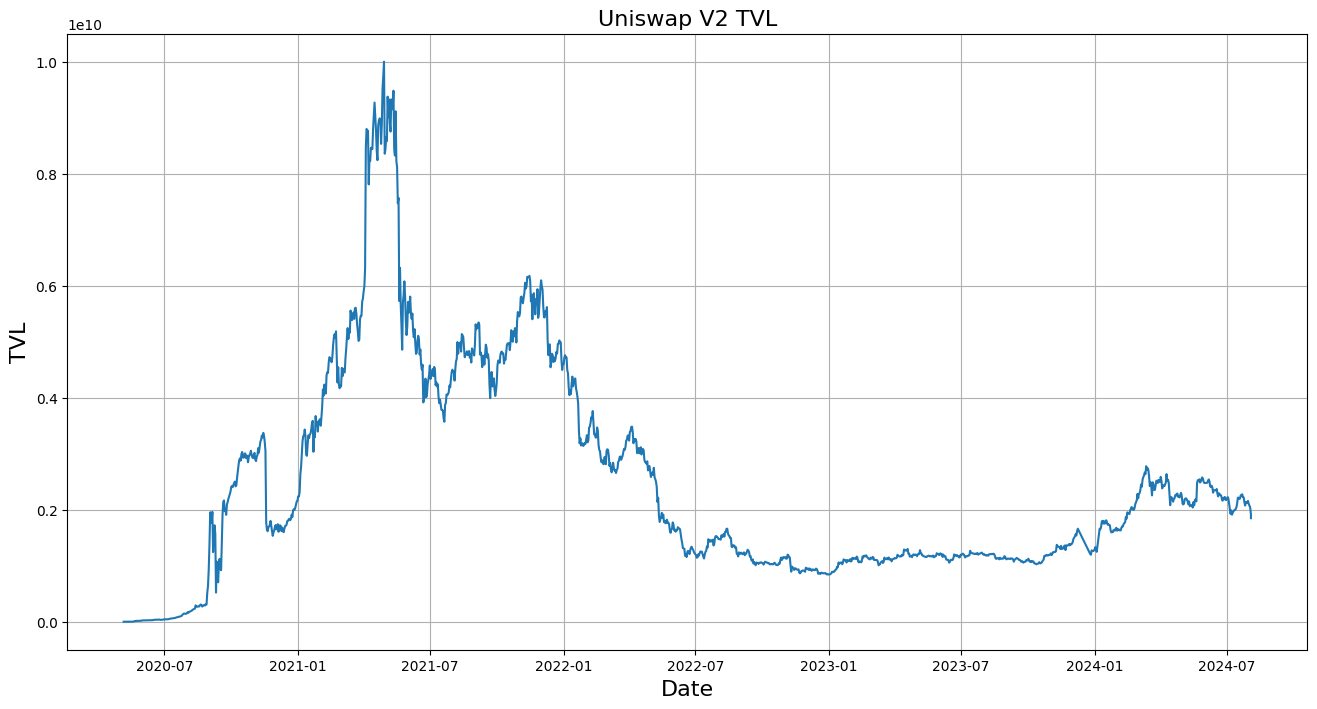

In [62]:
plt.figure(figsize=(16,8))
plt.title('Uniswap V2 TVL', fontsize=16)
plt.plot(list(df_uniswap_v2_tvl.Date), list(df_uniswap_v2_tvl.totalLiquidityUSD))
plt.grid(True)
plt.ylabel('TVL',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

#Uniswap V3

Выведем в каких сетях работает протокол Uniswap V3

In [63]:
data_v3 = requests.get('https://api.llama.fi/protocol/uniswap-v3').json()
tvls_v3 = data_v3['chainTvls']
networks_v3 = list(tvls_v3.keys())
print('Сети:', *networks_v3, sep=', ')
print('Количество сетей:', len(networks_v3))

Сети:, Sei, Manta, Mantle, Taiko, Polygon zkEVM, Moonbeam, Linea, Boba, RSK, Scroll, zkSync Era, Blast, Optimism, Celo, Avalanche, Arbitrum, Binance, Filecoin, Base, Polygon, Ethereum
Количество сетей: 21


Прежде всего построим общий TVL, затем TVL по каждой сети

In [64]:
date_to_tvl = {}

for network in networks_v3:

    tvl_time_data = data_v3['chainTvls'][network]['tvl'][:-1]

    dates = list(date_to_tvl.keys())
    for i in range(len(tvl_time_data)):
        cur_date = datetime.datetime.fromtimestamp(tvl_time_data[i]['date']).date()
        if cur_date in dates:
            date_to_tvl[cur_date] += tvl_time_data[i]['totalLiquidityUSD']
        else:
            date_to_tvl[cur_date] = tvl_time_data[i]['totalLiquidityUSD']

data_dict = {'Date' : list(date_to_tvl.keys()),
             'totalLiquidityUSD' : list(date_to_tvl.values())}

df_uniswap_v3_tvl = pd.DataFrame(data_dict).groupby('Date').max().reset_index()
df_uniswap_v3_tvl.head(10)

,Date,totalLiquidityUSD
0,2021-05-06,1.396867e+08
1,2021-05-07,3.726567e+08
2,2021-05-08,5.048761e+08
3,2021-05-09,5.669520e+08
4,2021-05-10,6.132043e+08
5,2021-05-11,5.988651e+08
6,2021-05-12,7.411635e+08
7,2021-05-13,8.665635e+08
8,2021-05-14,9.122352e+08
9,2021-05-15,9.752150e+08


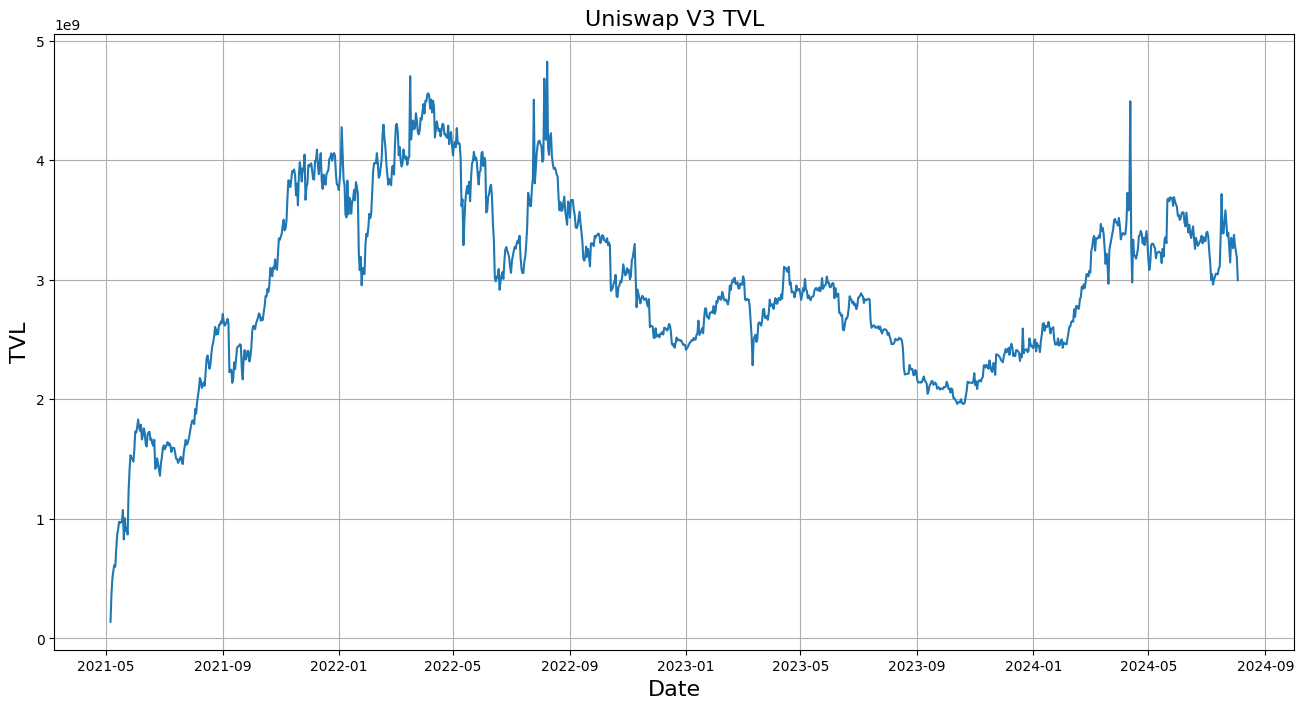

In [65]:
plt.figure(figsize=(16,8))
plt.title('Uniswap V3 TVL', fontsize=16)
plt.plot(list(df_uniswap_v3_tvl.Date), list(df_uniswap_v3_tvl.totalLiquidityUSD))
plt.grid(True)
plt.ylabel('TVL',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

Посмотрим на TVL Uniswap V2 и Uniswap V3 на одном графике

In [66]:
df_v2_v3 = df_uniswap_v2_tvl.copy()

# почему-то не подгрузились данные по этим дням и я посмотрел их вручную на DefiLlamo
date_to_tvl[datetime.datetime.strptime('11-07-2021', '%d-%m-%Y').date()] = 1.593*10**9
date_to_tvl[datetime.datetime.strptime('13-07-2021', '%d-%m-%Y').date()] = 1.547*10**9
date_to_tvl[datetime.datetime.strptime('06-08-2021', '%d-%m-%Y').date()] = 2.034*10**9
date_to_tvl[datetime.datetime.strptime('20-08-2023', '%d-%m-%Y').date()] = 2.212*10**9
date_to_tvl[datetime.datetime.strptime('21-08-2023', '%d-%m-%Y').date()] = 2.212*10**9
date_to_tvl[datetime.datetime.strptime('22-08-2023', '%d-%m-%Y').date()] = 2.215*10**9

df_v2_v3['totalLiquidityUSD_V2'] = df_v2_v3.totalLiquidityUSD
df_v2_v3['totalLiquidityUSD_V3'] = df_v2_v3.Date.apply(lambda x : date_to_tvl[x] if x in list(date_to_tvl.keys())
                                                      else 0.0)

df_v2_v3.head()

,Date,totalLiquidityUSD,totalLiquidityUSD_V2,totalLiquidityUSD_V3
0,2020-05-06,0.98992,0.98992,0.0
1,2020-05-07,3.18409,3.18409,0.0
2,2020-05-08,3.20149,3.20149,0.0
3,2020-05-09,18.78565,18.78565,0.0
4,2020-05-10,18.82144,18.82144,0.0


In [67]:
fig = px.line(df_v2_v3, x='Date', y=['totalLiquidityUSD_V2', 'totalLiquidityUSD_V3'],
              title='TVL: Uniswap V2 VS Uniswap V3')
fig.update_yaxes(title_text="TVL")
fig.show()

Видно, что Uniswap V3 постепенно обогнал по TVL протокол Uniswap V2, однако до пиковых значений ещё далеко. Uniswap v2 и v3 как будто сейчас находятся во флэте с постепенным ростом по TVL. \\

Заметим, что за последние несколько месяцев TVL у Uniswap v2 и v3 имеет некоторую корреляцию.



Посмотрим на разбивку TVL протокола Uniswap V3 по сетям

In [68]:
networks_list = {}

for network in networks_v3:
    tvl_time_data = data_v3['chainTvls'][network]['tvl'][:-1]
    date_to_tvl_tmp = {}
    for i in range(len(tvl_time_data)):
        cur_date = datetime.datetime.fromtimestamp(tvl_time_data[i]['date']).date()
        date_to_tvl_tmp[cur_date] = tvl_time_data[i]['totalLiquidityUSD']

    networks_list[network] = date_to_tvl_tmp

In [69]:
dates = list(networks_list['Ethereum'].keys())

data_dict = {'Date' : dates,
             'TVL_Ethereum_USD' : list(networks_list['Ethereum'].values())}

df_v3_networks = pd.DataFrame(data_dict)

for network in networks_v3:
    if network != 'Ethereum':
        name = 'TVL_' + network + '_USD'
        df_v3_networks[name] = df_v3_networks.Date.apply(lambda x : networks_list[network][x]
                                                               if x in list(networks_list[network].keys()) else 0.0)

df_v3_networks.head(10)

,Date,TVL_Ethereum_USD,TVL_Sei_USD,TVL_Manta_USD,TVL_Mantle_USD,TVL_Taiko_USD,TVL_Polygon zkEVM_USD,TVL_Moonbeam_USD,TVL_Linea_USD,TVL_Boba_USD,...,TVL_zkSync Era_USD,TVL_Blast_USD,TVL_Optimism_USD,TVL_Celo_USD,TVL_Avalanche_USD,TVL_Arbitrum_USD,TVL_Binance_USD,TVL_Filecoin_USD,TVL_Base_USD,TVL_Polygon_USD
0,2021-05-06,1.396867e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-05-07,3.726567e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-05-08,5.048761e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-05-09,5.669520e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-05-10,6.132043e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2021-05-11,5.988651e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2021-05-12,7.411635e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2021-05-13,8.665635e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,2021-05-14,9.122352e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2021-05-15,9.752150e+08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [70]:
fig = px.line(df_v3_networks, x='Date', y=['TVL_Ethereum_USD',
                                           'TVL_Optimism_USD',
                                           'TVL_Base_USD',
                                           'TVL_Moonbeam_USD',
                                           'TVL_Binance_USD',
                                           'TVL_Avalanche_USD',
                                           'TVL_Polygon_USD',
                                           'TVL_Celo_USD',
                                           'TVL_Arbitrum_USD',
                                           'TVL_zkSync Era_USD'],
              title='TVL Uniswap V3 by networks')
fig.update_yaxes(title_text="TVL")
fig.show()

Видно, что несмотря на то, что протокол разрабатывается под разные другие сети, в абсолютных значениях TVL протокола в сети Ethereum кратно выше, чем в других сетях. Построим график доли TVL в сети Ethereum относительно всего TVL протокола.

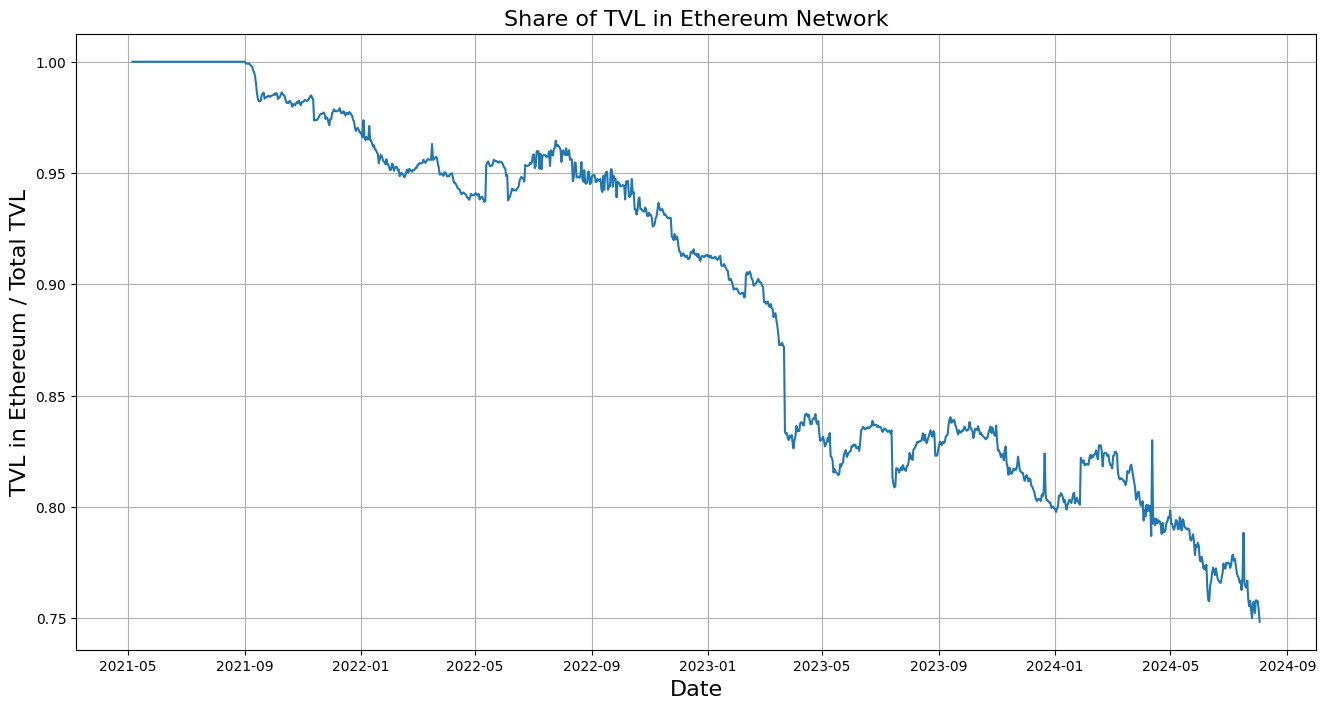

In [71]:
dates = list(df_v3_networks.Date)

tvl_in_eth = list(df_v3_networks.TVL_Ethereum_USD)
total_tvl = list(df_uniswap_v3_tvl.totalLiquidityUSD)

eth_share = [tvl_in_eth[i] / total_tvl[i] for i in range(len(dates))]

data_dict = {'Date' : dates,
             'Share in Ethereum Network' : eth_share}

df_share = pd.DataFrame(data_dict)

plt.figure(figsize=(16,8))
plt.title('Share of TVL in Ethereum Network', fontsize=16)
plt.plot(list(df_share.Date), list(df_share['Share in Ethereum Network']))
plt.grid(True)
plt.ylabel('TVL in Ethereum / Total TVL',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

Хотя абсолютный показатель TVL в сети Ethereum все еще очень высокий, виден тренд на снижение доли в сети Ethereum относительно всего TVL. Наиболее падение наблюдается в конце марта 2023, что соотвествует росту TVL в сети Arbitrum.

#Uniswap V2: Объем торгов

In [72]:
dexs_v2 = requests.get('https://api.llama.fi/summary/dexs/uniswap-v2').json()
volumes_v2 = dexs_v2['totalDataChart']

In [73]:
dates_list_v2 = []
volumes_list_v2 = []

for i in range(len(volumes_v2)):
    dates_list_v2 += [datetime.datetime.fromtimestamp(volumes_v2[i][0]).date()]
    volumes_list_v2 += [volumes_v2[i][1]]

data_dict = {'Date' : dates_list_v2,
             'TotalVolumesUSD' : volumes_list_v2}

df_uniswap_v2_volumes = pd.DataFrame(data_dict)
df_uniswap_v2_volumes.head(10)

,Date,TotalVolumesUSD
0,2020-05-11,1.984798e-01
1,2020-05-12,1.543564e+00
2,2020-05-13,1.547495e+01
3,2020-05-14,5.157864e+01
4,2020-05-15,5.750687e+02
5,2020-05-16,1.218787e+02
6,2020-05-17,3.033823e+01
7,2020-05-18,8.977576e+04
8,2020-05-19,1.209861e+06
9,2020-05-20,1.210554e+06


In [74]:
fig = px.line(df_uniswap_v2_volumes, x="Date", y="TotalVolumesUSD", title='Uniswap V2 Volumes')
fig.update_yaxes(title_text="Volume")
fig.show()

"Сгладим" данные недельным и месячным скользящим средним

In [75]:
df_uniswap_v2_volumes['rolling_volumes_7d'] = df_uniswap_v2_volumes.TotalVolumesUSD.rolling(7).mean()
df_uniswap_v2_volumes['rolling_volumes_30d'] = df_uniswap_v2_volumes.TotalVolumesUSD.rolling(30).mean()

x_vals = list(df_uniswap_v2_volumes.Date)
y_vals_total = list(df_uniswap_v2_volumes.TotalVolumesUSD)
y_vals_7d = list(df_uniswap_v2_volumes.rolling_volumes_7d)
y_vals_30d = list(df_uniswap_v2_volumes.rolling_volumes_30d)

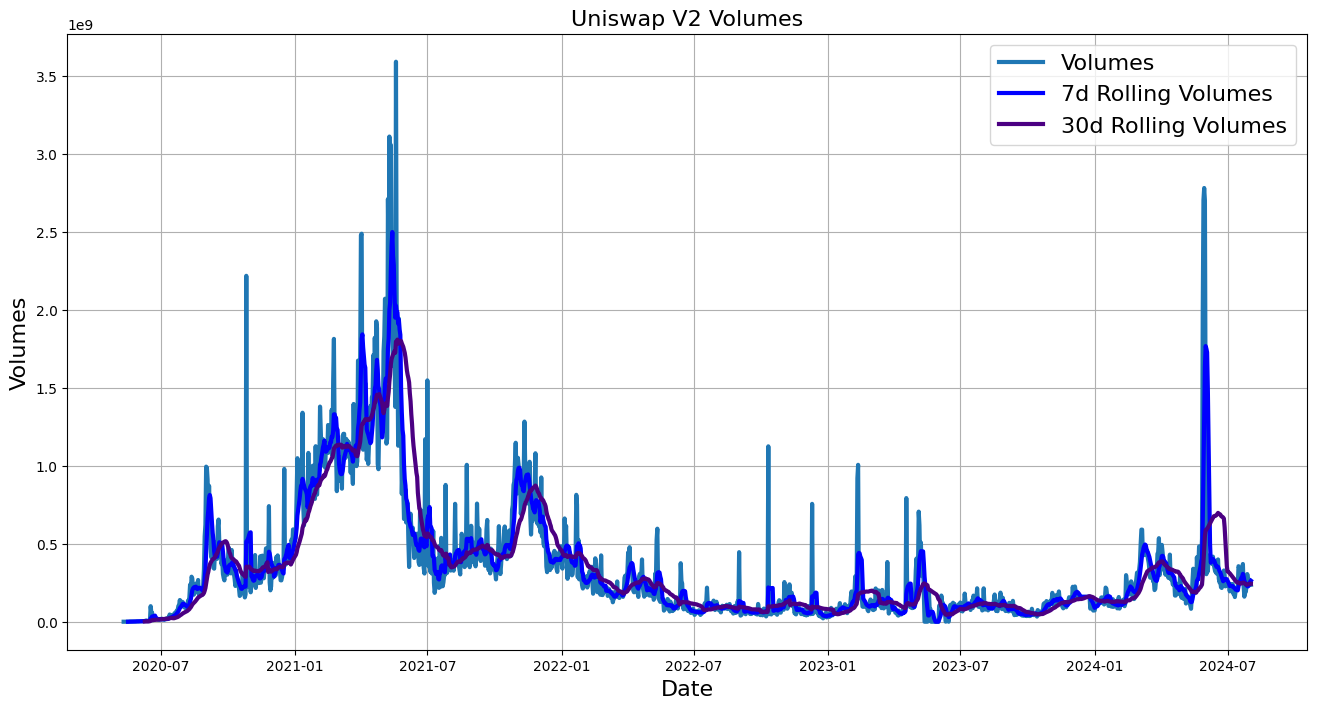

In [76]:
plt.figure(figsize=(16,8))
plt.title('Uniswap V2 Volumes', fontsize=16)
plt.plot(x_vals, y_vals_total, label='Volumes', linewidth= 3)
plt.plot(x_vals, y_vals_7d, color='blue', label='7d Rolling Volumes', linewidth= 3)
plt.plot(x_vals, y_vals_30d, color='indigo', label='30d Rolling Volumes', linewidth= 3)
plt.grid(True)
plt.ylabel('Volumes',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

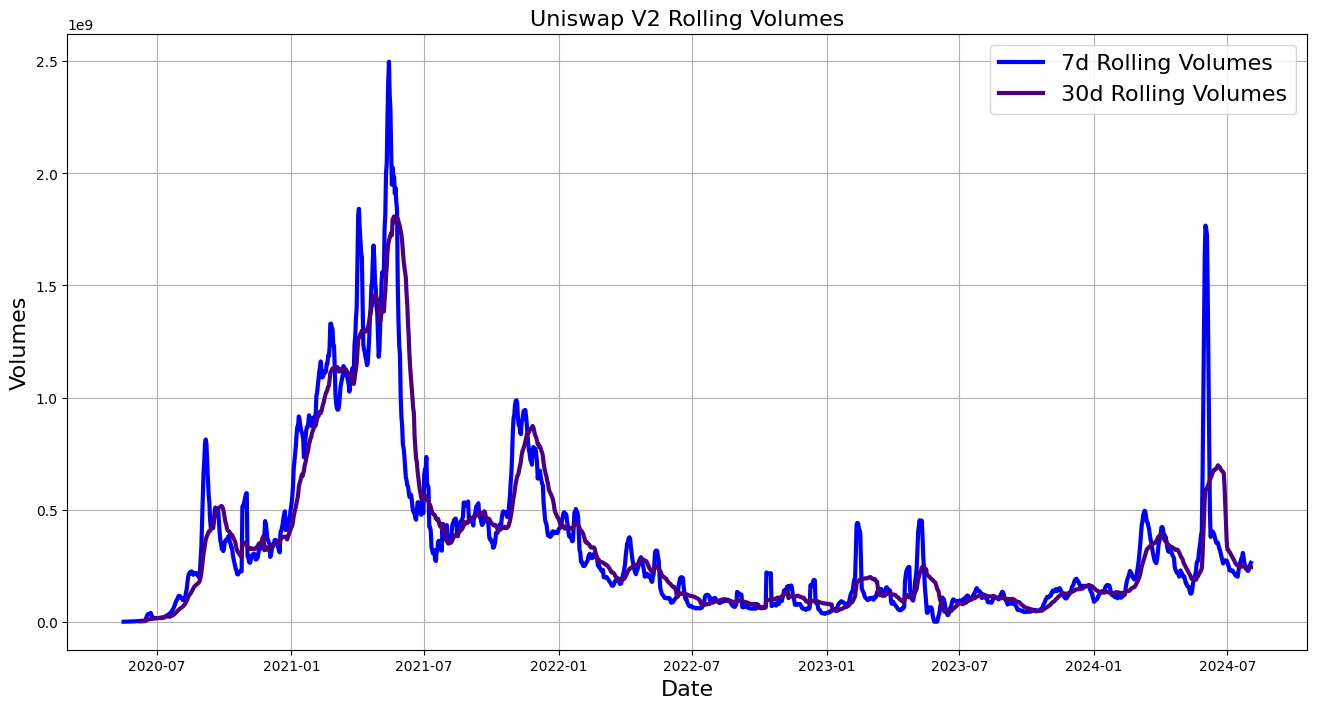

In [77]:
plt.figure(figsize=(16,8))
plt.title('Uniswap V2 Rolling Volumes', fontsize=16)
plt.plot(x_vals, y_vals_7d, color='blue', label='7d Rolling Volumes', linewidth= 3)
plt.plot(x_vals, y_vals_30d, color='indigo', label='30d Rolling Volumes', linewidth= 3)
plt.grid(True)
plt.ylabel('Volumes',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

Посчитаем стандартные отклонения по "скользящим" данным

In [78]:
std_7d = df_uniswap_v2_volumes.rolling_volumes_7d.std()
std_30d = df_uniswap_v2_volumes.rolling_volumes_30d.std()
print('std 7d:', std_7d)
print('std 30d:', std_30d)

std 7d: 381771709.67153585
std 30d: 358345435.08574516


Таким образом можно отметить, что произошло достаточно сильное снижение объемов торгов, тк стандартное отклонение средних 30 дневных торгов сильно превышает объемы торгов в последние пару месяцев.

Посмотрим на объемы торгов с 1 марта 2024

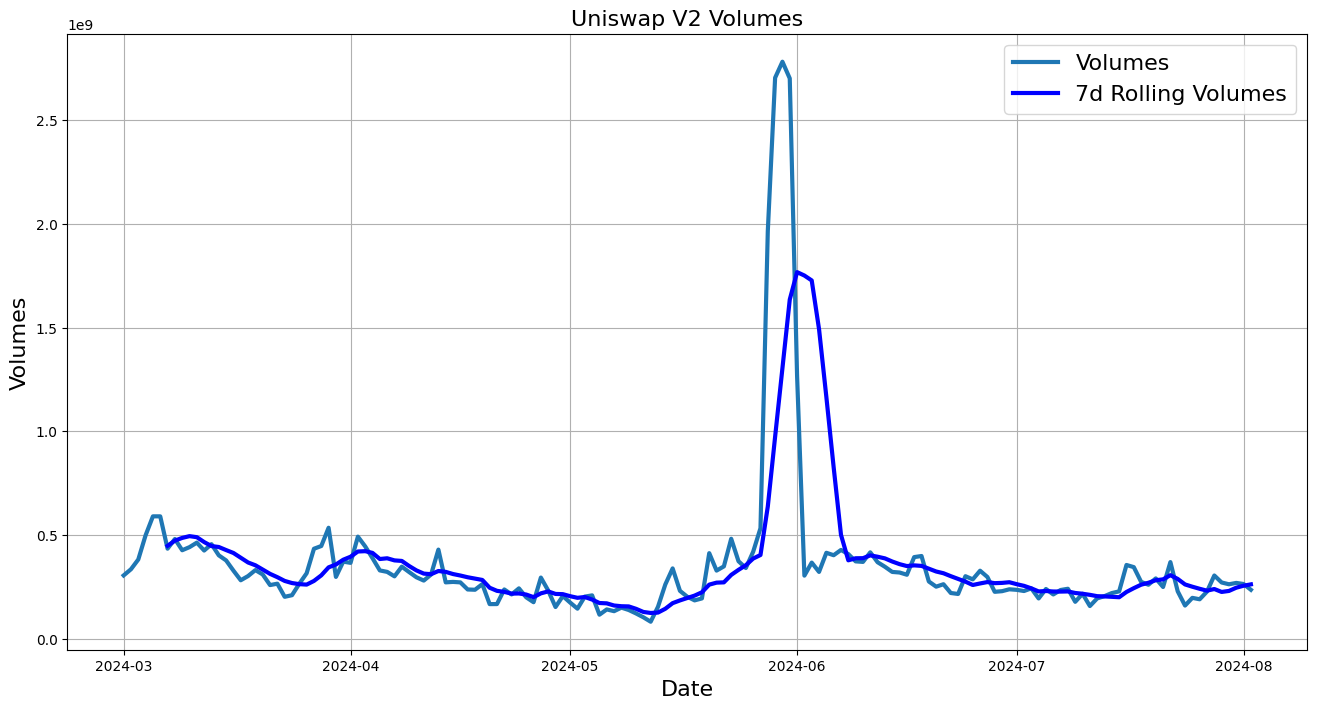

In [79]:
df_uniswap_v2_volumes_june = df_uniswap_v2_volumes[df_uniswap_v2_volumes.Date >=
                                                   datetime.datetime.strptime('01-03-2024', '%d-%m-%Y').date()].copy()

df_uniswap_v2_volumes_june['rolling_volumes_7d'] = df_uniswap_v2_volumes_june.TotalVolumesUSD.rolling(7).mean()


x_vals = list(df_uniswap_v2_volumes_june.Date)
y_vals_total = list(df_uniswap_v2_volumes_june.TotalVolumesUSD)
y_vals_7d = list(df_uniswap_v2_volumes_june.rolling_volumes_7d)

plt.figure(figsize=(16,8))
plt.title('Uniswap V2 Volumes', fontsize=16)
plt.plot(x_vals, y_vals_total, label='Volumes', linewidth= 3)
plt.plot(x_vals, y_vals_7d, color='blue', label='7d Rolling Volumes', linewidth= 3)
plt.grid(True)
plt.ylabel('Volumes',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

In [80]:
df_uniswap_v2_volumes_june['rolling_volumes_7d'].std()

291798554.9158185

В сравнении со стандартным отклонением на данных "за все время" стандартное отклонение на данных с 1 марта 2024 по 3 августа 2024 явно ниже, что говорит о том, что объемы торгов находятся в некотором "флете", несмотря на большой скачок 30-31 мая.

#Uniswap V3: Объем торгов

In [81]:
dexs_v3 = requests.get('https://api.llama.fi/summary/dexs/uniswap-v3').json()
volumes_v3 = dexs_v3['totalDataChart']

In [82]:
dates_list_v3 = []
volumes_list_v3 = []

for i in range(len(volumes_v3)):
    dates_list_v3 += [datetime.datetime.fromtimestamp(volumes_v3[i][0]).date()]
    volumes_list_v3 += [volumes_v3[i][1]]

data_dict = {'Date' : dates_list_v3,
             'TotalVolumesUSD' : volumes_list_v3}

df_uniswap_v3_volumes = pd.DataFrame(data_dict)
df_uniswap_v3_volumes.head(10)

,Date,TotalVolumesUSD
0,2021-05-05,1.693718e+07
1,2021-05-06,2.097926e+08
2,2021-05-07,3.515877e+08
3,2021-05-08,6.112520e+08
4,2021-05-09,4.643965e+08
5,2021-05-10,7.883454e+08
6,2021-05-11,6.288152e+08
7,2021-05-12,1.185948e+09
8,2021-05-13,1.535202e+09
9,2021-05-14,8.201637e+08


In [83]:
df_uniswap_v3_volumes['rolling_volumes_7d'] = df_uniswap_v3_volumes.TotalVolumesUSD.rolling(7).mean()
df_uniswap_v3_volumes['rolling_volumes_30d'] = df_uniswap_v3_volumes.TotalVolumesUSD.rolling(30).mean()

In [84]:
fig = px.line(df_uniswap_v3_volumes, x="Date", y=["TotalVolumesUSD",
                                                  "rolling_volumes_7d",
                                                  "rolling_volumes_30d"], title='Uniswap V3 Volumes')
fig.update_yaxes(title_text="Volume")
fig.show()

На первый взгляд объемы торгов в протоколе Uniswap V3 более "ровные", чем мы видели в Uniswap V2, однако:

1) Все ещё видны сильные флуктуации, хотя не наблюдается явных патернов снижения или роста \\
2) Для подтверждения выводов, о флуктуации торговых объемов требуется провести визуальное и количественное сравнение с Uniswap V2 \\
Отметим, что исторический максимум объема торгов (11 марта 2023), судя по информации в интернете, вызван падением курса пары USDC/USD, в связи с чем появлялась некоторая "неэффективность" в рынке, на чем можно было неплохо заработать. \\

Перейдем к численным характеристикам

Также, как и ранее, оценим стандартные отклонения торгов.

In [85]:
std_hist_v3 = df_uniswap_v3_volumes.TotalVolumesUSD.std()
std_7d_v3 = df_uniswap_v3_volumes.rolling_volumes_7d.std()
std_30d_v3 = df_uniswap_v3_volumes.rolling_volumes_30d.std()
print('std:', std_hist_v3)
print('std 7d:', std_7d_v3)
print('std 30d:', std_30d_v3)

std: 807871613.4427931
std 7d: 595083855.0833229
std 30d: 474584824.1251076


Для сравнения выведем еще раз аналогичные показатели, но для Uniswap V2

In [86]:
std_hist_v2 = df_uniswap_v2_volumes.TotalVolumesUSD.std()
std_7d_v2 = df_uniswap_v2_volumes.rolling_volumes_7d.std()
std_30d_v2 = df_uniswap_v2_volumes.rolling_volumes_30d.std()
print('std:', std_hist_v2)
print('std 7d:', std_7d_v2)
print('std 30d:', std_30d_v2)

std: 411766560.49848
std 7d: 381771709.67153585
std 30d: 358345435.08574516


И выведем соответствующие разницы

In [87]:
std_hist = df_uniswap_v3_volumes.TotalVolumesUSD.std()
std_7d = df_uniswap_v3_volumes.rolling_volumes_7d.std()
std_30d = df_uniswap_v3_volumes.rolling_volumes_30d.std()
print('diff std:', std_hist_v3 - std_hist_v2)
print('diff std 7d:', std_7d_v3 - std_7d_v2)
print('diff std 30d:', std_30d_v3 - std_30d_v2)

diff std: 396105052.9443131
diff std 7d: 213312145.41178703
diff std 30d: 116239389.03936243


Добавим визуальной составляющей, а именно выведем объемы торгов в Uniswap V2 и в Uniswap V3 на одном графике

In [88]:
df_v2_v3_volumes = df_uniswap_v2_volumes.copy()

date_to_volume_v3 = {}
for i in range(len(dates_list_v3)):
    date_to_volume_v3[dates_list_v3[i]] = volumes_list_v3[i]

df_v2_v3_volumes['Volume_Uniswap_V2'] = df_v2_v3_volumes.TotalVolumesUSD
df_v2_v3_volumes['Volume_Uniswap_V3'] = df_v2_v3_volumes.Date.apply(lambda x : date_to_volume_v3[x] if x in
                                                                    list(date_to_volume_v3.keys()) else 0.0)

df_v2_v3_volumes['rolling_volumes_7d_v2'] = df_v2_v3_volumes.rolling_volumes_7d
df_v2_v3_volumes['rolling_volumes_7d_v3'] = df_v2_v3_volumes.Volume_Uniswap_V3.rolling(7).mean()

df_v2_v3_volumes['rolling_volumes_30d_v2'] = df_v2_v3_volumes.rolling_volumes_30d
df_v2_v3_volumes['rolling_volumes_30d_v3'] = df_v2_v3_volumes.Volume_Uniswap_V3.rolling(30).mean()

df_v2_v3_volumes.head()

,Date,TotalVolumesUSD,rolling_volumes_7d,rolling_volumes_30d,Volume_Uniswap_V2,Volume_Uniswap_V3,rolling_volumes_7d_v2,rolling_volumes_7d_v3,rolling_volumes_30d_v2,rolling_volumes_30d_v3
0,2020-05-11,0.198480,NaN,NaN,0.198480,0.0,NaN,NaN,NaN,NaN
1,2020-05-12,1.543564,NaN,NaN,1.543564,0.0,NaN,NaN,NaN,NaN
2,2020-05-13,15.474948,NaN,NaN,15.474948,0.0,NaN,NaN,NaN,NaN
3,2020-05-14,51.578643,NaN,NaN,51.578643,0.0,NaN,NaN,NaN,NaN
4,2020-05-15,575.068727,NaN,NaN,575.068727,0.0,NaN,NaN,NaN,NaN


In [89]:
fig = px.line(df_v2_v3_volumes, x='Date', y=['Volume_Uniswap_V2', 'Volume_Uniswap_V3'],
              title='Volumes: Uniswap V2 VS Uniswap V3')
fig.update_yaxes(title_text="Volume")
fig.show()

И сглаженные данные:

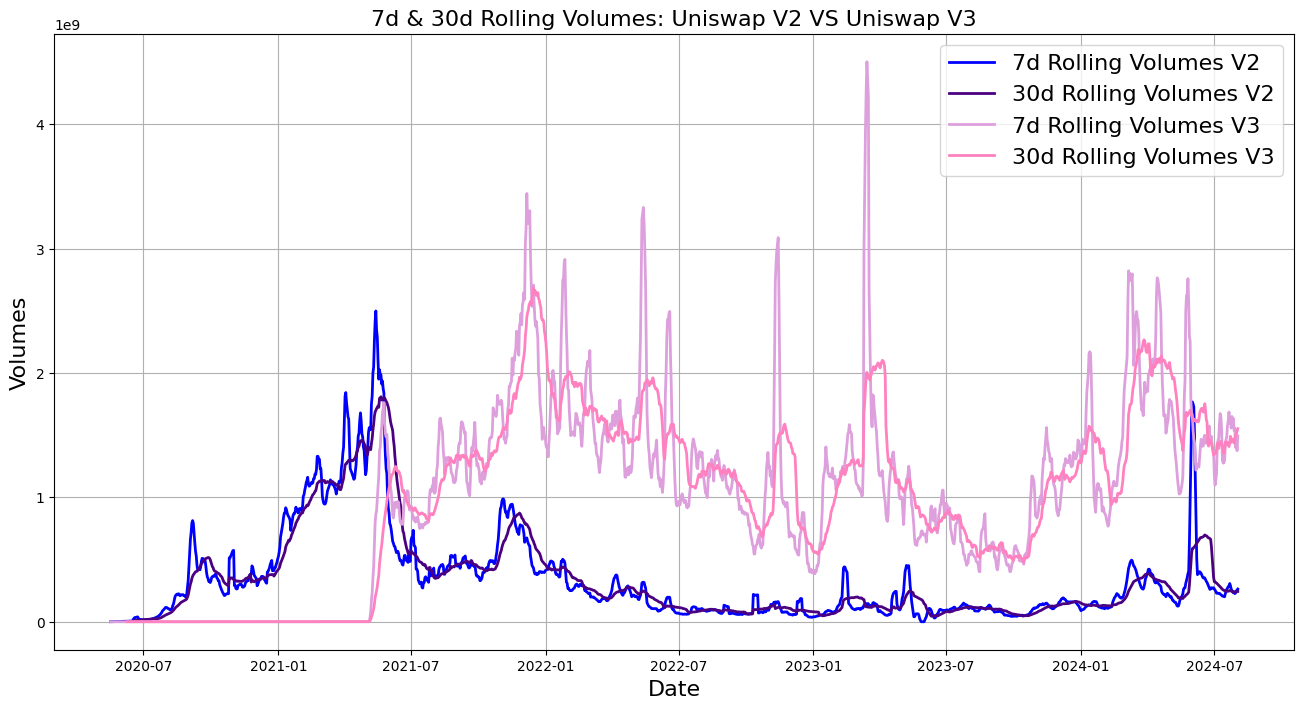

In [90]:
x_vals = list(df_v2_v3_volumes.Date)
y_vals_7d_v2 = list(df_v2_v3_volumes.rolling_volumes_7d_v2)
y_vals_30d_v2 = list(df_v2_v3_volumes.rolling_volumes_30d_v2)
y_vals_7d_v3 = list(df_v2_v3_volumes.rolling_volumes_7d_v3)
y_vals_30d_v3 = list(df_v2_v3_volumes.rolling_volumes_30d_v3)

plt.figure(figsize=(16,8))
plt.title('7d & 30d Rolling Volumes: Uniswap V2 VS Uniswap V3', fontsize=16)
plt.plot(x_vals, y_vals_7d_v2, color='blue', label='7d Rolling Volumes V2', linewidth= 2)
plt.plot(x_vals, y_vals_30d_v2, color='indigo', label='30d Rolling Volumes V2', linewidth= 2)
plt.plot(x_vals, y_vals_7d_v3, color='#DDA0DD', label='7d Rolling Volumes V3', linewidth= 2)
plt.plot(x_vals, y_vals_30d_v3, color='#FF81C0', label='30d Rolling Volumes V3', linewidth= 2)
plt.grid(True)
plt.ylabel('Volumes',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

Исходя из данных выше видно следующее: \\

1) Стандартные отклонения объемов торгов в протоколе Uniswap V3 выше на 100+млн USD в сравнении с Uniswap V2, что свидетельствует о более высоких флуктуациях. \\
2) При просмотре скользящих данных в Uniswap V3 и Uniswap V2 наблюдается паттерн снижения объемов за последние несколько месяцев. \\
3) Хотя TVL в Uniswap V3 сильно ниже, чем TVL, который был в протоколе Uniswap V2 до появления Uniswap V3, объемы торгов в Uniswap V3 кратно выше, чем в Uniswap V2 (например, объемы торгов Uniswap V3 в 2022 году были на уровне исторических максимумов объемов в Uniswap V2).

#Торги в окрестности недели от даты одобрения первых Bitcoin ETF (04.01.24 - 18.01.24)

В последние дни вырос "спрос" на криптовалюты, а именно Bitcoin, в связи с одобрением внедрения со стороны SEC спотового BTC-ETF. Посмотрим как повлияли данные новости объемы торгов на Uniswap V2 и Uniswap V3.

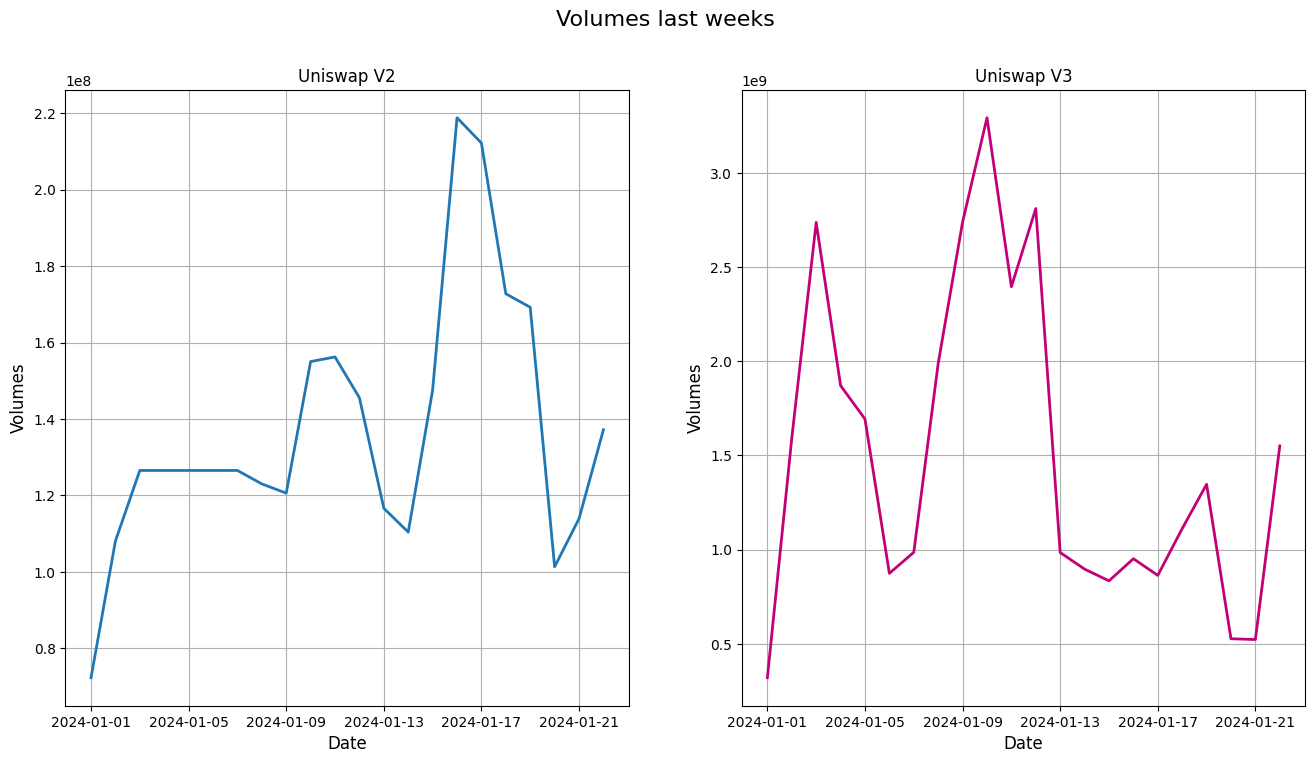

In [91]:
df_v2_v3_volumes_last_weeks = df_v2_v3_volumes[df_v2_v3_volumes.Date >=
                                               datetime.datetime.strptime('01-01-2024', '%d-%m-%Y').date()].copy()

df_v2_v3_volumes_last_weeks = df_v2_v3_volumes_last_weeks[df_v2_v3_volumes_last_weeks.Date <=
                                               datetime.datetime.strptime('22-01-2024', '%d-%m-%Y').date()].copy()

x_vals = list(df_v2_v3_volumes_last_weeks.Date)
y_vals_v2 = list(df_v2_v3_volumes_last_weeks.Volume_Uniswap_V2)
y_vals_v3 = list(df_v2_v3_volumes_last_weeks.Volume_Uniswap_V3)

plt.figure(figsize=(16,8))
plt.suptitle('Volumes last weeks', fontsize=16)


plt.subplot(1, 2, 1)
plt.title('Uniswap V2',fontsize=12)
plt.plot(x_vals, y_vals_v2, linewidth=2)
plt.grid(True)
plt.xticks([x_vals[i] for i in range(len(x_vals)) if i % 4 == 0])
plt.ylabel('Volumes',  fontsize=12)
plt.xlabel('Date',  fontsize=12)

plt.subplot(1, 2, 2)
plt.title('Uniswap V3',fontsize=12)
plt.plot(x_vals, y_vals_v3, color='#C20078', linewidth=2)
plt.grid(True)
plt.xticks([x_vals[i] for i in range(len(x_vals)) if i % 4 == 0])
plt.ylabel('Volumes',  fontsize=12)
plt.xlabel('Date',  fontsize=12)

plt.show()

В целом, видно, что объемы в обоих протоколах выросли на новостном фоне, но в Uniswap v2 пик роста пришелся на несколько дней позже даты одобрения(11.01.2024). Тем не менее и в Uniswap v2 и в Uniswap v3 спустя несколько дней объемы резко пошли на спад, относительно их новостного пика.

#Лучшие по объему торгов пулы

Посмотрим какие пулы являются наиболее популярным в Uniswap V2 и Uniswap V3

In [92]:
url_v2 = 'https://gateway-arbitrum.network.thegraph.com/api/4c3244c3aa223e258480ade68afc50f1/subgraphs/id/EYCKATKGBKLWvSfwvBjzfCBmGwYNdVkduYXVivCsLRFu'

query_v2 = f"""{{
  pairs(orderBy: volumeUSD, orderDirection: desc, first: 4) {{
    token0 {{
      symbol
    }}
    token1 {{
      symbol
    }}
  }}
}}
"""

response = requests.post(url_v2, json={'query': query_v2})
json_data_v2 = json.loads(response.text)
json_data_v2

{'data': {'pairs': [{'token0': {'symbol': 'USDC'},
    'token1': {'symbol': 'WETH'}},
   {'token0': {'symbol': 'WETH'}, 'token1': {'symbol': 'USDT'}},
   {'token0': {'symbol': 'UST'}, 'token1': {'symbol': 'mNFLX'}},
   {'token0': {'symbol': 'DAI'}, 'token1': {'symbol': 'WETH'}}]}}

In [93]:
url_v3 = 'https://gateway-arbitrum.network.thegraph.com/api/4c3244c3aa223e258480ade68afc50f1/subgraphs/id/5zvR82QoaXYFyDEKLZ9t6v9adgnptxYpKpSbxtgVENFV'

query_v3 = f"""{{
    pools(
        orderBy: volumeUSD,
        orderDirection: desc,
        first: 4
        ) {{
            id
            token0 {{
                symbol
            }}
            token1 {{
                symbol
            }}
            }}
        }}
"""

response = requests.post(url_v3, json={'query': query_v3})
json_data_v3 = json.loads(response.text)
json_data_v3

{'data': {'pools': [{'id': '0x88e6a0c2ddd26feeb64f039a2c41296fcb3f5640',
    'token0': {'symbol': 'USDC'},
    'token1': {'symbol': 'WETH'}},
   {'id': '0x11b815efb8f581194ae79006d24e0d814b7697f6',
    'token0': {'symbol': 'WETH'},
    'token1': {'symbol': 'USDT'}},
   {'id': '0x3416cf6c708da44db2624d63ea0aaef7113527c6',
    'token0': {'symbol': 'USDC'},
    'token1': {'symbol': 'USDT'}},
   {'id': '0x8ad599c3a0ff1de082011efddc58f1908eb6e6d8',
    'token0': {'symbol': 'USDC'},
    'token1': {'symbol': 'WETH'}}]}}

В Uniswap V2 пары с наибольшими объемами - USDC / wETH, wETH / USDT, DAI / wETH, в то время как в Uniswap V3 пулы с наибольшими объемами USDC / wETH, wETH / USDT, USDC / USDT.

Интересно, что и в Uniswap V2 и V3 первые два места по объемам занимают пулы с одной торговой парой.

Посмотрим на графики цен пары ETH / USDC в пуле Uniswap V3 и, например, на централизованной бирже Binance

In [97]:
query_v3_top1_pool = f"""{{
    pools(
        orderBy: volumeUSD,
        orderDirection: desc,
        first: 1
        ) {{
            id
            token0 {{
                symbol
            }}
            token1 {{
                symbol
            }}
            poolDayData(
                first: 1000
                orderBy: date,
                orderDirection: asc
                ){{
                    date
                    token0Price
                    token1Price
                    high
                    low
                    open
                    close
                }}
            }}
        }}
"""

response = requests.post(url_v3, json={'query': query_v3_top1_pool})
json_data_top1_pool = json.loads(response.text)

prices_pool_data = json_data_top1_pool['data']['pools'][0]['poolDayData'][1:]

dates_list_pool = []
open_list_pool = []
close_list_pool = []
low_list_pool = []
high_list_pool = []
token0Price_list = []

for i in range(len(prices_pool_data)):
    dates_list_pool += [datetime.datetime.fromtimestamp(prices_pool_data[i]['date']).date()]
    open_list_pool += [float(prices_pool_data[i]['open'])]
    close_list_pool += [float(prices_pool_data[i]['close'])]
    low_list_pool += [float(prices_pool_data[i]['low'])]
    high_list_pool += [float(prices_pool_data[i]['high'])]
    token0Price_list += [float(prices_pool_data[i]['token0Price'])]

data_dict = {'Date' : dates_list_pool,
             'open_pool' : open_list_pool,
             'close_pool' : close_list_pool,
             'low_pool' : low_list_pool,
             'high_pool' : high_list_pool,
             'token0Price_pool' : token0Price_list}

df_pool_prices = pd.DataFrame(data_dict)
df_pool_prices

,Date,open_pool,close_pool,low_pool,high_pool,token0Price_pool
0,2021-05-06,3519.716693,3519.716693,3395.383086,3613.912924,3496.292879
1,2021-05-07,3492.800581,3492.800581,3367.326465,3577.139148,3483.701459
2,2021-05-08,3448.215490,3448.215490,3448.215490,4065.429779,3884.370431
3,2021-05-09,3886.561270,3886.561270,3739.033294,3998.817353,3909.453752
4,2021-05-10,3912.758406,3912.758406,3720.115494,4202.193789,3968.366567
...,...,...,...,...,...,...
994,2024-01-25,2233.069407,2233.069407,2166.505026,2239.566546,2216.738000
995,2024-01-26,2216.727635,2216.727635,2195.699375,2279.616193,2267.835904
996,2024-01-27,2267.803325,2267.803325,2252.297416,2280.818414,2266.853035
997,2024-01-28,2267.739040,2267.739040,2241.679762,2306.545796,2257.069342


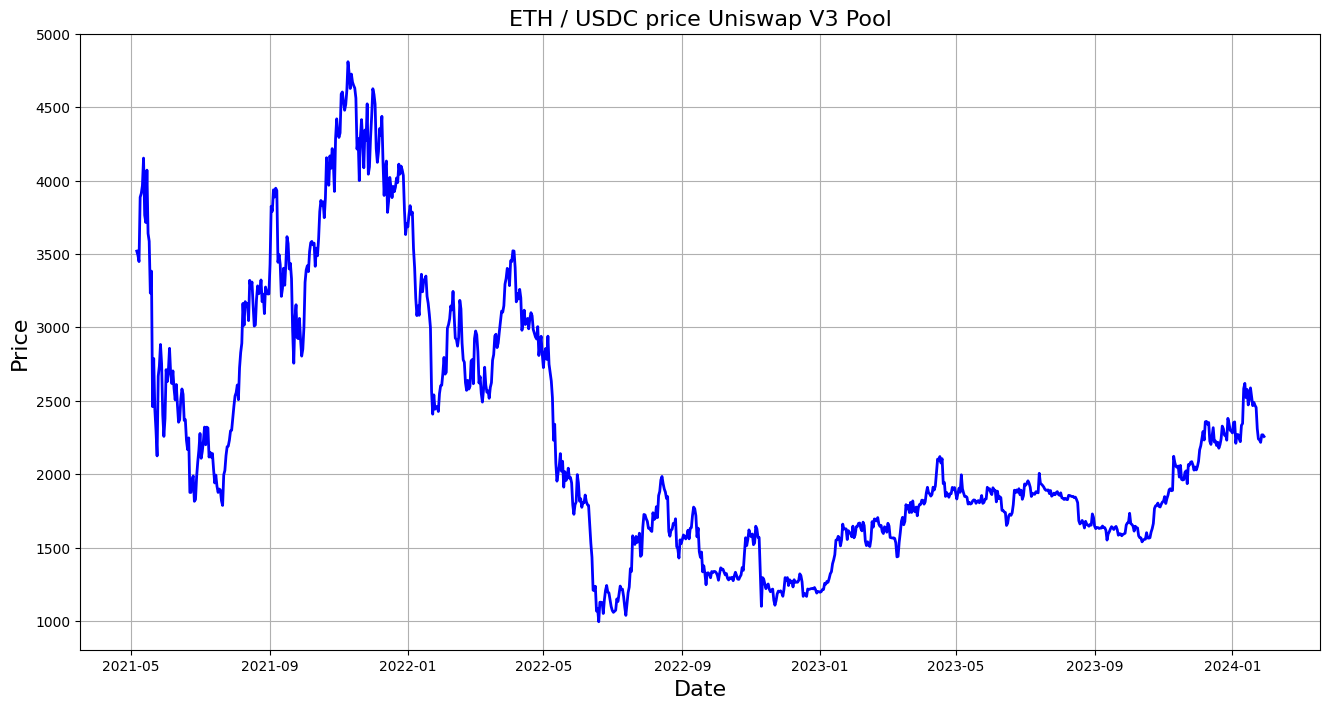

In [95]:
x_vals = list(df_pool_prices.Date)
y_vals = list(df_pool_prices.close_pool)

plt.figure(figsize=(16,8))
plt.title('ETH / USDC price Uniswap V3 Pool', fontsize=16)
plt.plot(x_vals, y_vals, color='blue', linewidth= 2)
plt.grid(True)
plt.ylabel('Price',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

In [106]:
market = 'ETHUSDC'
tick_interval = '1d'

url_binance_eth = 'https://api.binance.com/api/v3/klines?symbol='+market+'&interval='+tick_interval
data_binance_eth = requests.get(url_binance_eth).json()

dates_list_binance = []
eth_usdc_open_price_binance = []
eth_usdc_close_price_binance = []
eth_usdc_low_price_binance = []
eth_usdc_high_price_binance = []

for i in range(len(data_binance_eth)):
    dates_list_binance += [datetime.datetime.utcfromtimestamp(data_binance_eth[i][0] / 1000).date()]
    eth_usdc_open_price_binance += [float(data_binance_eth[i][1])]
    eth_usdc_close_price_binance += [float(data_binance_eth[i][4])]
    eth_usdc_low_price_binance += [float(data_binance_eth[i][3])]
    eth_usdc_high_price_binance += [float(data_binance_eth[i][2])]

data_dict = {'Date' : dates_list_binance,
             'open_binance' : eth_usdc_open_price_binance,
             'close_binance' : eth_usdc_close_price_binance,
             'low_binance' : eth_usdc_low_price_binance,
             'high_binance' : eth_usdc_high_price_binance,
             }

df_eth_usdc_binance = pd.DataFrame(data_dict)
df_eth_usdc_binance.head()

,Unnamed: 0,datetime,close
856,856,2021-05-06,3491.934393
857,857,2021-05-07,3482.544772
858,858,2021-05-08,3914.890943
859,859,2021-05-09,3927.758441
860,860,2021-05-10,3948.979413
...,...,...,...
1850,1850,2024-01-25,2218.206695
1851,1851,2024-01-26,2267.591479
1852,1852,2024-01-27,2267.961011
1853,1853,2024-01-28,2256.813679


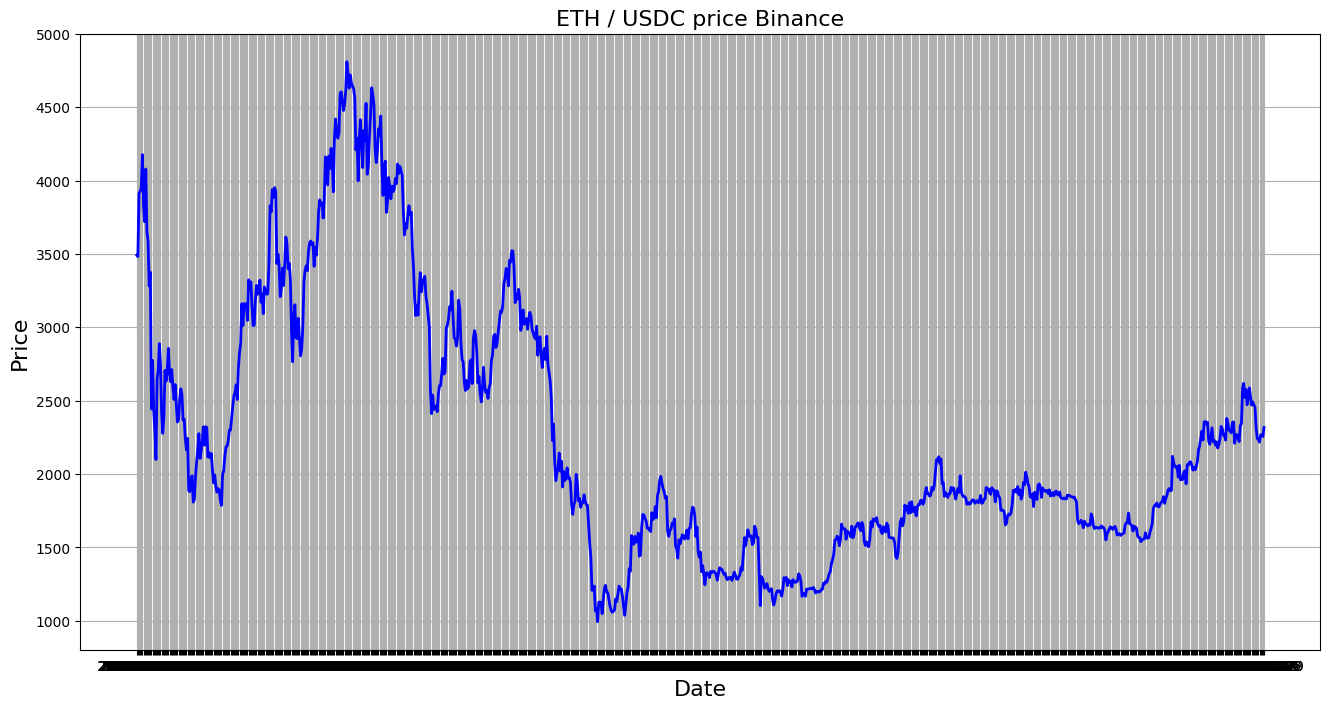

In [129]:
x_vals = list(df_eth_usdc_binance['datetime'])
y_vals = list(df_eth_usdc_binance['close'])

plt.figure(figsize=(16,8))
plt.title('ETH / USDC price Binance', fontsize=16)
plt.plot(x_vals, y_vals, color='blue', linewidth= 2)
plt.grid(True)
plt.ylabel('Price',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

Наложим на один график цены с пула и с бинанса

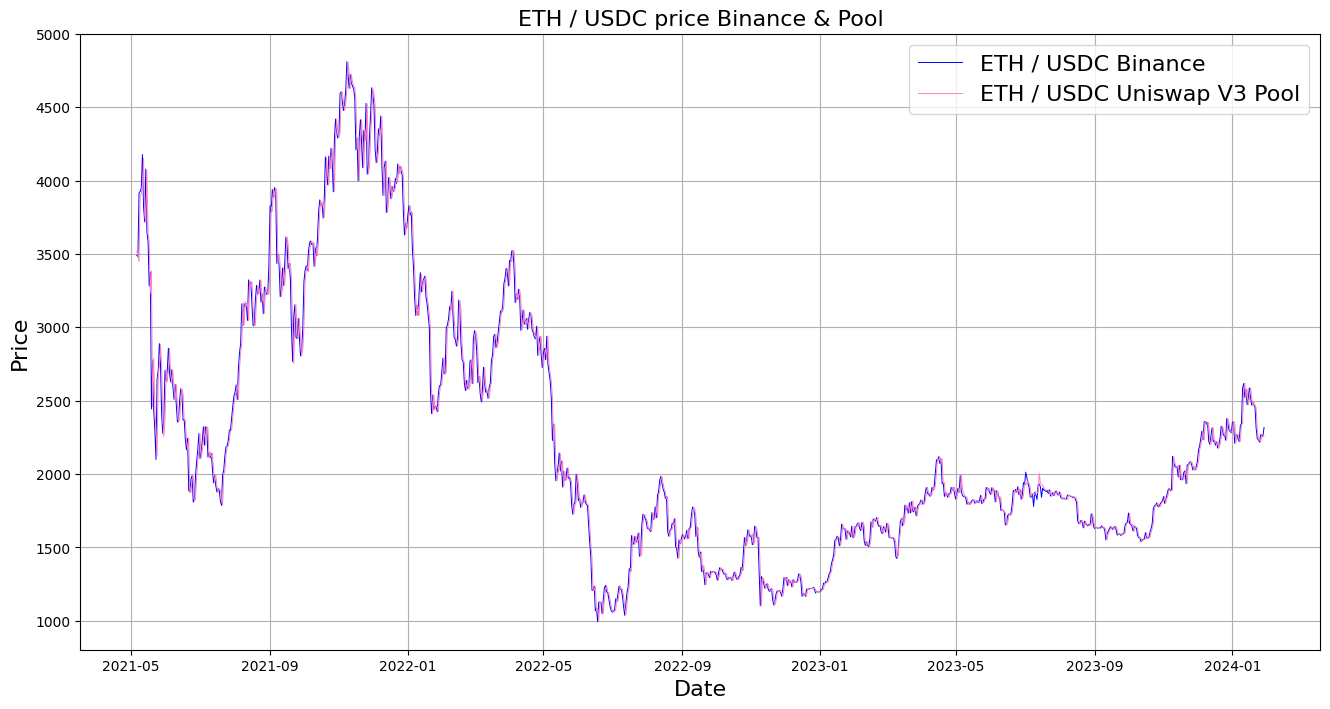

In [139]:
x_vals = list(df_pool_prices.Date)

y_vals_binance = list(df_eth_usdc_binance['close'])

y_vals_pool = list(df_pool_prices.close_pool)

plt.figure(figsize=(16,8))
plt.title('ETH / USDC price Binance & Pool', fontsize=16)
plt.plot(x_vals, y_vals_binance, color='blue', label = 'ETH / USDC Binance', linewidth= 0.7)
plt.plot(x_vals, y_vals_pool, color='#FF81C0', label = 'ETH / USDC Uniswap V3 Pool', linewidth= 0.7)
plt.grid(True)
plt.ylabel('Price',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

График цен закрытия не идут как одна прямая, цена в Uniswap V3 пуле "отстает" от цены на Binance, что может открывать возможности для арбитража.

Перейдем к анализу нативного токена UNI

#Токен UNI

Начнем анализ нативного токена Uniswap с его supply

In [140]:
request_url = 'https://api.coingecko.com/api/v3/coins/uniswap'

response = requests.get(request_url)
data = response.json()

total_supply = data['market_data']['total_supply']
max_supply = data['market_data']['max_supply']
circulating_supply = data['market_data']['circulating_supply']

print('Total Supply:', total_supply)
print('Max Supply:', max_supply)
print('Circulating Supply:', circulating_supply)

Total Supply: 1000000000.0
Max Supply: 1000000000.0
Circulating Supply: 753766667.0


На текущий момент эмитировано максимальное количество токенов. В обращении находится 75% от общей эмиссии.



Посмотрим на торговые объемы и цену токена

In [144]:
request_url = 'https://api.coingecko.com/api/v3/coins/uniswap/market_chart?vs_currency=usd&days=365&interval=daily'

response = requests.get(request_url)
data = response.json()

dates_dict = {}
dates_prices = data['prices']
for i in range(len(dates_prices)):
    dates_dict[datetime.datetime.utcfromtimestamp(dates_prices[i][0] / 1000).date()] = [dates_prices[i][1]]

dates_volumes = data['total_volumes']
for i in range(len(dates_volumes)):
    dates_dict[datetime.datetime.utcfromtimestamp(dates_volumes[i][0] / 1000).date()].append(dates_volumes[i][1])

data_dict = {'Date' : list(dates_dict.keys())}

df_uni_data = pd.DataFrame(data_dict)
df_uni_data['price'] = df_uni_data.Date.apply(lambda x : dates_dict[x][0])
df_uni_data['volume'] = df_uni_data.Date.apply(lambda x : dates_dict[x][1])
df_uni_data.tail(10)

,Date,price,volume
355,2024-07-25,7.423799,1.424033e+08
356,2024-07-26,7.292099,1.815535e+08
357,2024-07-27,7.687682,1.314172e+08
358,2024-07-28,7.690879,1.474446e+08
359,2024-07-29,7.534460,8.971192e+07
360,2024-07-30,7.683253,1.485881e+08
361,2024-07-31,7.389599,1.118692e+08
362,2024-08-01,7.221626,1.114300e+08
363,2024-08-02,7.198000,1.856301e+08
364,2024-08-03,6.577538,1.710327e+08


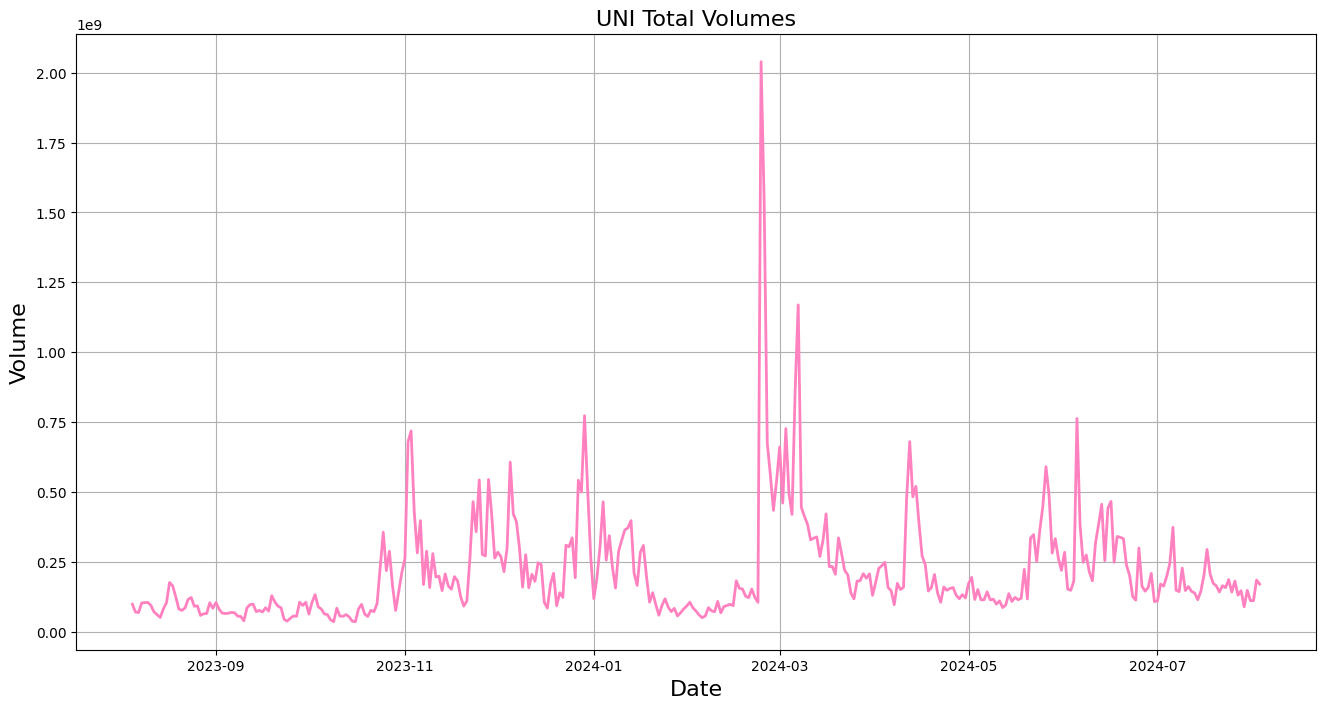

In [145]:
x_vals = list(df_uni_data.Date)

y_vals = list(df_uni_data.volume)

plt.figure(figsize=(16,8))
plt.title('UNI Total Volumes', fontsize=16)
plt.plot(x_vals, y_vals, color='#FF81C0', linewidth= 2)
plt.grid(True)
plt.ylabel('Volume',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

Данный график напоминает график объемов в Uniswap V2. \\

Динамичный подъем и далее снижение в близкие к нулю значения -  свидетельствует о снижении интереса к токену. Для эстетики посмотрим на сглаженные данные.

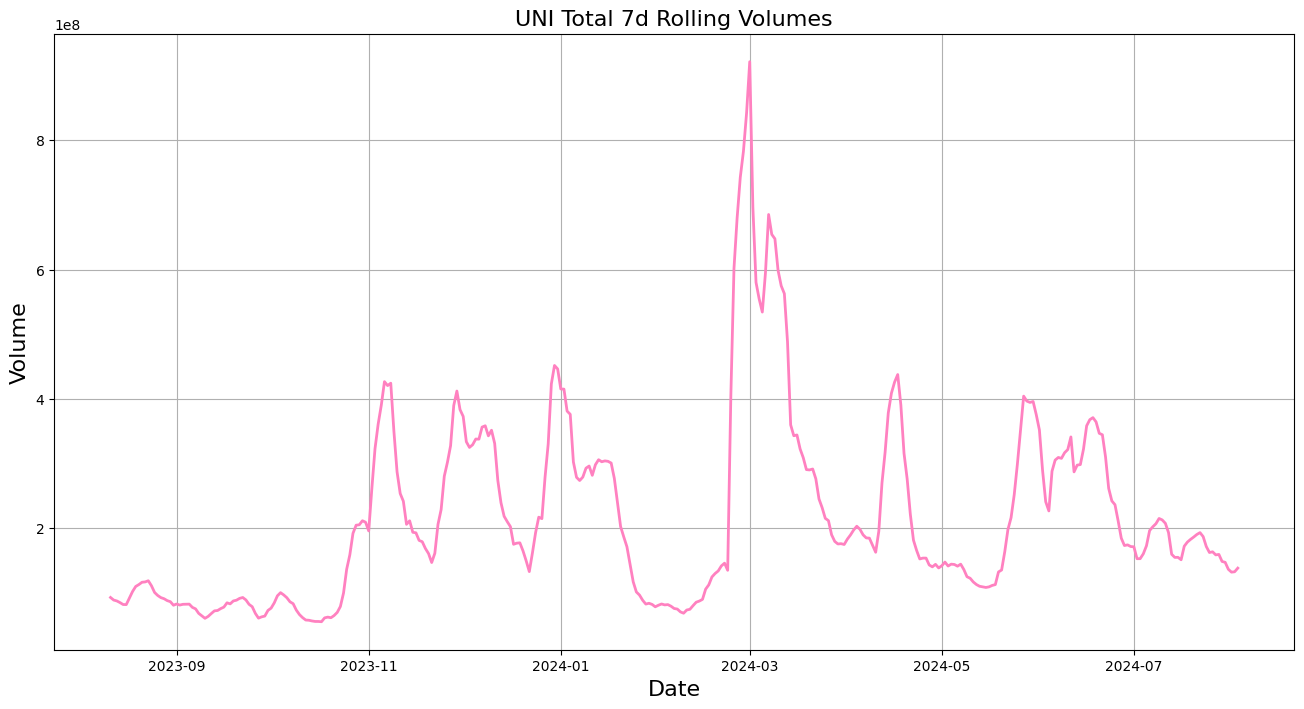

In [146]:
df_uni_data['rolling_volumes_7d'] = df_uni_data.volume.rolling(7).mean()

x_vals = list(df_uni_data.Date)

y_vals = list(df_uni_data.rolling_volumes_7d)

plt.figure(figsize=(16,8))
plt.title('UNI Total 7d Rolling Volumes', fontsize=16)
plt.plot(x_vals, y_vals, color='#FF81C0', linewidth= 2)
plt.grid(True)
plt.ylabel('Volume',  fontsize=16)
plt.xlabel('Date',  fontsize=16)

plt.show()

Посмотрим на цену токена против USD

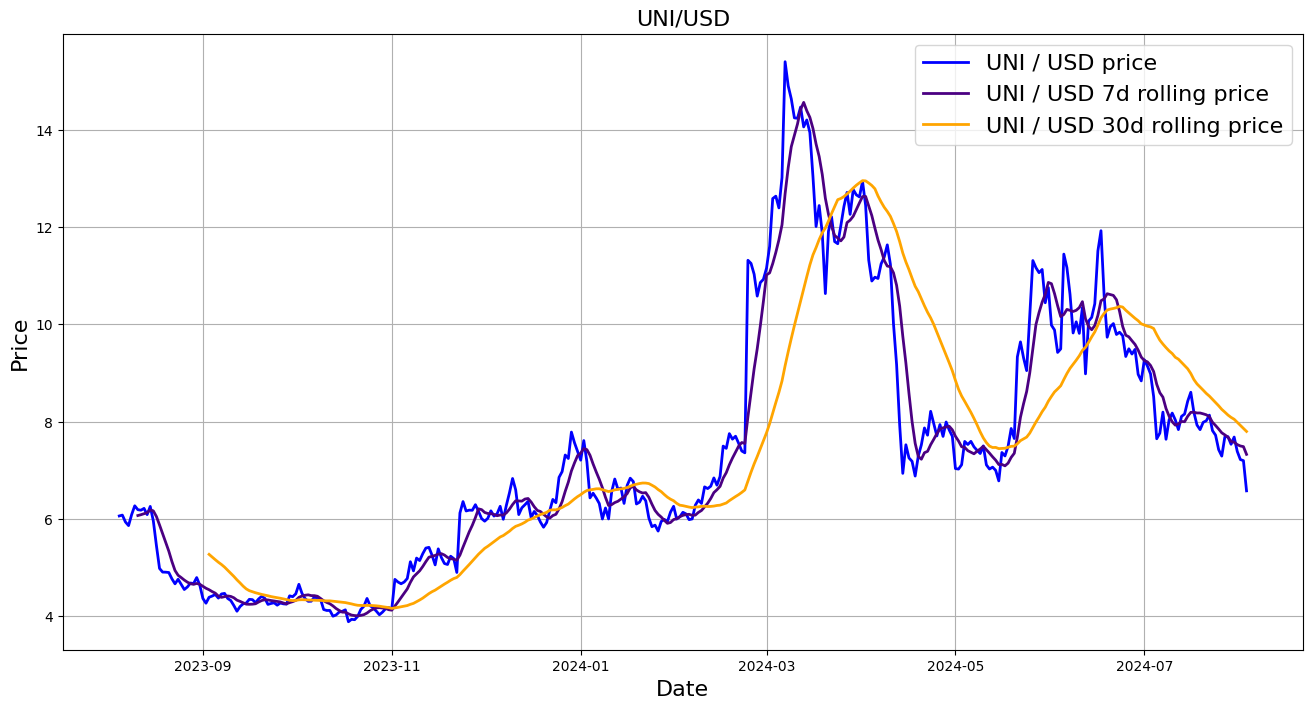

In [147]:
df_uni_data['rolling_price_7d'] = df_uni_data.price.rolling(7).mean()
df_uni_data['rolling_price_30d'] = df_uni_data.price.rolling(30).mean()

x_vals = list(df_uni_data.Date)

y_vals_price = list(df_uni_data.price)
y_vals_7d = list(df_uni_data.rolling_price_7d)
y_vals_30d = list(df_uni_data.rolling_price_30d)

plt.figure(figsize=(16,8))
plt.title('UNI/USD', fontsize=16)
plt.plot(x_vals, y_vals_price, color='blue', label='UNI / USD price', linewidth= 2)
plt.plot(x_vals, y_vals_7d, color='indigo', label='UNI / USD 7d rolling price', linewidth= 2)
plt.plot(x_vals, y_vals_30d, color='orange', label='UNI / USD 30d rolling price', linewidth= 2)
plt.grid(True)
plt.ylabel('Price',  fontsize=16)
plt.xlabel('Date',  fontsize=16)
plt.legend(fontsize=16)

plt.show()

Вместе с объемами падает и цена на токен. \\
В районе 3-4 USD проходит сопротивление, от которого монету откупают.



Все же, несмотря на то, что существует ряд факторов, а в частности судебные тяжбы с SEC, из-за которых интерес к проекту несколько падает, UNISWAP находится в ТОП-7 проектов по TVL и работает в 22х сетях.